# [파이썬 머신러닝 완벽 가이드] <br>
# 06 차원 축소

## 06-1 차원 축소 (Dimension Reduction) 개요 <br>

- **차원 축소**: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소(sparse)한 구조를 가지게 됨
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
- 피처가 많을 경우 개별 피처 간의 상관관계가 높을 가능성이 크며 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하됨
<br><br>
- 차원 축소는 `피처 선택 (feature selection)`과 `피처 추출 (feature extraction)`으로 나눌 수 있음
    - 피처(특성) 선택: 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
    - 피처(특성) 추출: 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것 (이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 됨
<br><br>
- 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 **잠재적인 요소 (Latent Factor)**를 추출하는 것임
- 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘: `PCA`, `SVD`, `NMF`
- 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있음
- 이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 과적합(overfitting) 영향력이 작아져서 오히려 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어 올릴 수 있음
<br><br>
- 차원 축소 알고리즘이 자주 사용되는 또 다른 영역은 텍스트 문서의 **숨겨진 의미**를 추출하는 것임
- 문서 내 단어들의 구성에서 숨겨져 있는 `시맨틱(Semantic)` 의미나 `토픽(Topic)`을 잠재 요소로 간주하고 이를 찾아낼 수 있음
- 'SVD'와 'NMF'는 이러한 시맨틱 토픽 (Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용됨

## 06-2 PCA (Principal Component Analysis) <br>
### [PCA 개요]
- PCA (Principal Component Analysis)는 가장 대표적인 차원 축소 기법임
- PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 `주성분(Principal Component)`을 추출해 차원을 축소하는 기법임
- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연함
- 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데 이것이 PCA의 주성분이 됨 (즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주함)
<br><br>

#### (예시) 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
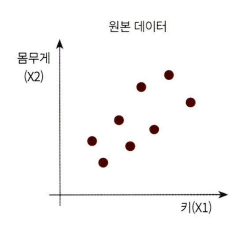
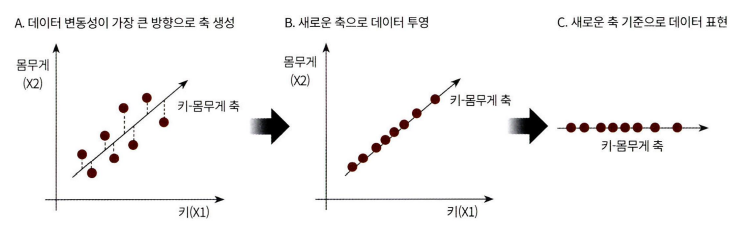
<br><br>
- PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고 두 번째 축은 이 벡터 축에 직각이 되는 벡터 (직교 벡터)를 축으로 함
- 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성함
- 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨 <br>
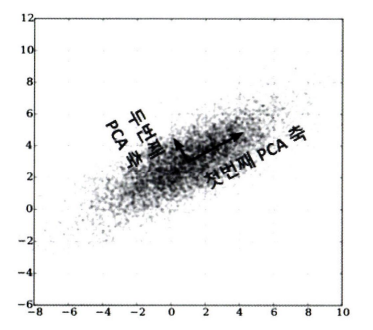 <br>
- PCA (주성분 분석)은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법임
- PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬 (Covariance Matrix)을 고유값 분해하고 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것임
- 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고유값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분상르 나타냄
<br><br>
- 일반적으로 선형 변환은 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미함
- 이를 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로 볼 수 있으며, 이 경우 이 행렬을 바로 공간으로 가정하는 것임
- 보통 분산은 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미함 (공분산 Cov(X,Y) > 0은 X가 증가할 때 Y도 증가한다는 의미)
- 공분산 행렬은 여러 변수와 관련된 공분산을 포함하는 정방형 행렬임 <br>
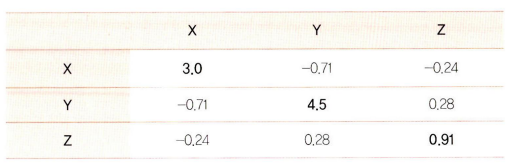 <br>
- 공분산 행렬에서 대각선 원소는 각 변수 (X,Y,Z)의 분산을 의미하며 대각선 이외의 원소는 가능한 모든 변수 쌍 간의 공분산을 의미함
<br><br>
- 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭함
- 즉 `Ax = ax` (A는 행렬, x는 고유벡터, a는 스칼라값)
- 이 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음 (2x2 행렬은 두 개의 고유벡터를, 3x3 행렬은 3개의 고유벡터를 가질 수 있음)
- 이렇게 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용됨
<br><br>
- 공분산 행렬은 정방행렬 (Diagonal Matrix)이며 대칭행렬 (Symmetric Matrix)임
- 정방행렬은 열과 행이 같은 행렬을 지칭하는데, 정방 행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬 (A<sup>T</sup>=A인 행렬)을 대칭행렬이라고 부름
- 공분산 행렬은 개별 분산값을 대각 원소로 하는 대칭행렬임
- 대칭행렬은 항상 고유벡터를 직교행렬 (orthogonal matrix)로 고유값을 정방행렬로 대각화할 수 있다는 매우 좋은 특성이 있음
<br><br>
- 입력 데이터의 공분산 행렬을 C라고 하면, 공분산 행렬의 특성으로 인해 C = PΣP<sup>T</sup> 와 같이 분해할 수 있음
- P는 n x n의 직교행렬이며, Σ는 n x n 정방행렬, P<sup>T</sup>는 행렬 P의 전치행렬임
- 위 식은 고유벡터 행렬과 고유값 행렬로 다음과 같이 대응됨 <br>
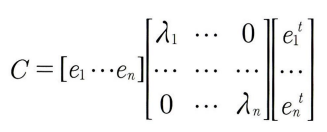 <br>
- 공분산 C는 고유벡터 직교행렬 * 고유값 정방행렬 * 고유벡터 직교행렬의 전치행렬로 분해됨
- e<sub>i</sub>는 i번째 고유벡터를, λ<sub>i</sub>는 i번째 고유벡터의 크기를 의미하며 e<sub>1</sub>은 가장 분산이 큰 방향을 가진 고유벡터이며, e<sub>2</sub>는 e<sub>1</sub>에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터임
<br><br>
- **PCA: 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식**
<br><br>
- `PCA의 수행 스텝`
    1. 입력 데이터 세트의 공분산 행렬을 생성함
    2. 공분산 행렬의 고유벡터와 고유값을 계산함
    3. 고유값이 가장 큰 순으로 K개 (PCA 변환 차수만큼)만큼 고유벡터를 추출함
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


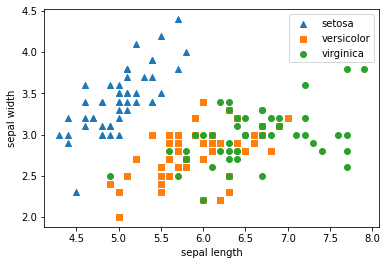

In [4]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- Setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정ㅎ아게 분포되어 있음
- Versicolor와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있음

In [5]:
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #n_components: PCA로 변환할 차원의 수

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
#PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


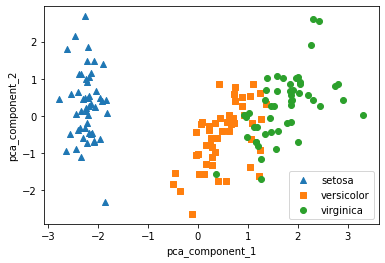

In [10]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표시
markers = ['^','s','o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA로 변환한 후에도 pca_component_1 축을 기반으로 Setosa 품종은 명확하게 구분이 가능함
- Versicolor와 Virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 잘 구분됨
- PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문임

In [11]:
#PCA 변환을 수행한 PCA 객체의 explained_variace_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공함
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며, 두 번째인 pca_component_2가 약 22.8%를 차지함
- 따라서, PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 3개 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 3개 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [14]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 3개 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 3개 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수 밖에 없음
- 10%의 정확도 하락은 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있음

### [신용카드 고객 데이터 세트 PCA]
- 30000개의 레코드와 24개의 속성을 가지고 있음
- 'default payment next month' 속성이 Target 값으로 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0을 의미

In [15]:
#header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel("C:/Users/kimhj/Desktop/ESAA/Data/credit_card.xls", header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [16]:
#PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0을 PAY_1로 변경
#default payment next month 칼럼명이 너무 길어서 default로 변경
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

#default 칼럼을 Target으로 지정
y_target = df['default']

#Tagrget 값 제외한 피처 데이터 생성
X_features = df.drop('default',axis=1)

<AxesSubplot:>

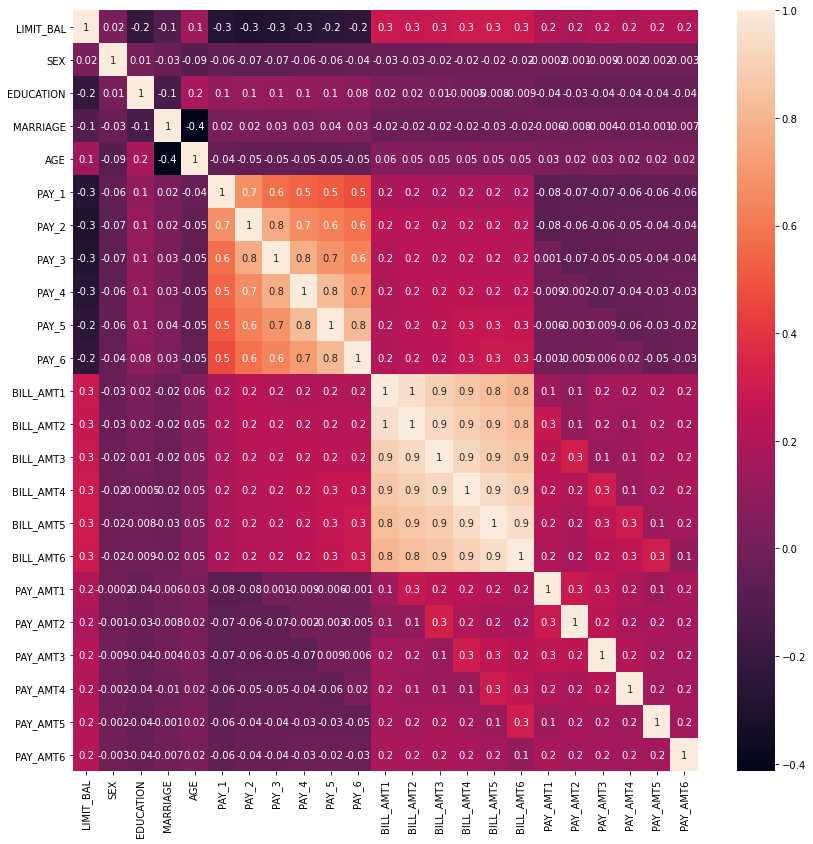

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- 이보다는 낮지만 PAY_1 ~ PAY_6까지의 속성 역시 상관도가 높음
- 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있음

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있음
- 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7911 0.7961 0.8015]
PCA 변환 데이터 세트 평균 정확도: 0.7962


- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생함
- 1~2%의 예측 성능 저하는 미비한 성능 저하고 보기는 힘들지만, 전체 속성의 1/4 정도만으로도 이정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것이라고 생각됨
- PCA는 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용할 수 있지만, 이보다 더 활발하게 적용되는 영역은 컴퓨터 비전 (Computer Vision) 분야임
- 특히 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많음

## 06-3 LDA (Linear Discriminant Analysis) <br>
### [LDA 개요]
- LDA (Linear Discriminant Analysis)는 선형 판별 분석법으로 불리며, PCA와 매우 유사함
- LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류 (Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함
- PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
<br><br>
- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 `클래스 간 분산 (between-class scatter)`과 `클래스 내부 분산 (within-class scatter)`의 비율을 최대화하는 방식으로 차원을 축소함
- 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식임 <br>
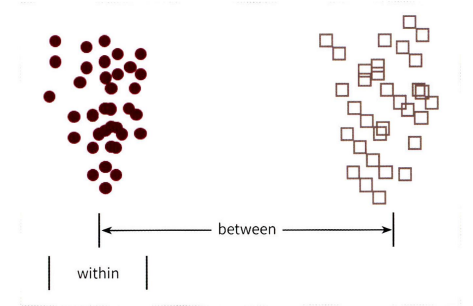 <br>
- 일반적으로 LDA를 구하는 스텝은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점임
<br><br>
- `LDA의 수행 스텝`
    1. 클래스 내부와 클래스 간 분산 행렬을 구함. 이 두 개 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터 (mean vector)를 기반으로 구함
    2. 클래스 내부 분산 행렬을 S<sub>w</sub>, 클래스 간 분산 행렬을 S<sub>B</sub>라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있음 <br>
    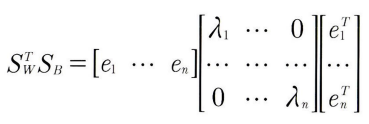 <br>
    3. 고유값이 가장 큰 순으로 K개 (LDA 변환 차수만큼) 추출함
    4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함

### [붓꽃 데이터 세트에 LDA 적용하기]

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_sclaed = StandardScaler().fit_transform(iris.data)

- PCA와 다르게 LDA에서 한 가지 유의해야 할 점은 LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이라는 점임
- 즉, 클래스의 결정값이 변환 시에 필요함
- 다음 lda 객체의 fit() 메소드를 호출할 때 결정값이 입력됐음에 유의해야 함

In [23]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


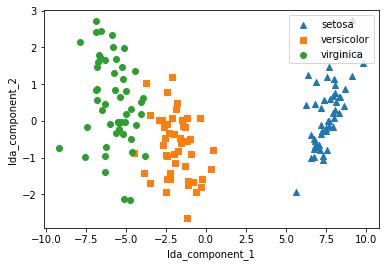

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표시
markers = ['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF['target'] == i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## 06-4 SVD (Singular Value Decomposition) <br>
### [SVD 개요]
- SVD 역시 PCA와 유사한 행렬 기법을 이용함
- PCA의 경우 정방행렬 (즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음
- SVD는 m x n 크기의 행렬 A를 A = UΣV<sup>T</sup> 와 같이 분해할 수 있음
- SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터 (singular vector)이며, 모든 특이벡터는 서로 직교하는 성질을 가짐
- Σ는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값이 모두 0이며, Σ이 위치한 0이 아닌 값이 바로 행렬 A의 특이값임
- SVD는 A의 차원이 m x n일 때 U의 차원이 m x m, Σ의 차원이 m x n, V<sup>T</sup>의 차원이 n x n으로 분해함 <br>
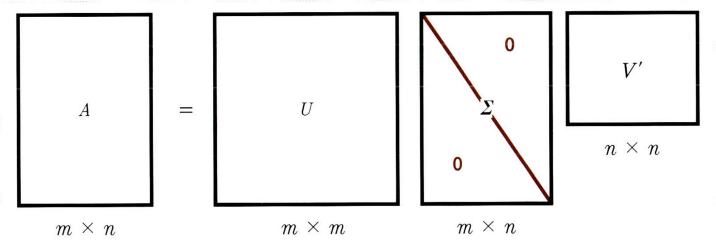 <br>
- 하지만 일반적으로는 다음과 같이 Σ의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 Σ에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용함
- 이렇게 컴팩트한 형태로 SVD를 적용하면 A의 차원이 m x n일 때, U의 차원을 m x p, Σ의 차원을 p x p, V<sup>T</sup>의 차원을 p x n으로 분해함 <br>
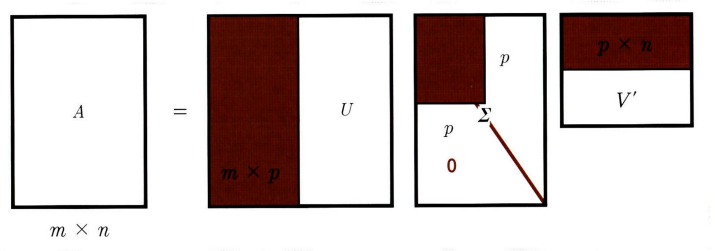 <br>
- Truncated SVD는 Σ의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것임
- 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행함

In [25]:
#넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

#4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [26]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [28]:
#Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

#U, Sigma, Vt를 이용해 a_는 원본 행렬 a와 동일하게 복원됨

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [30]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

#a 행렬이 이전과 다르게 로우 간 관계가 매우 높아짐

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [31]:
#다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [33]:
#U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

#U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [35]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) #output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

### [사이킷런 TruncatedSVD 클래스를 이용한 변환]

Text(0, 0.5, 'TruncatedSVD Component 2')

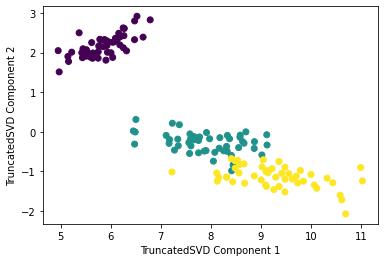

In [36]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data
#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

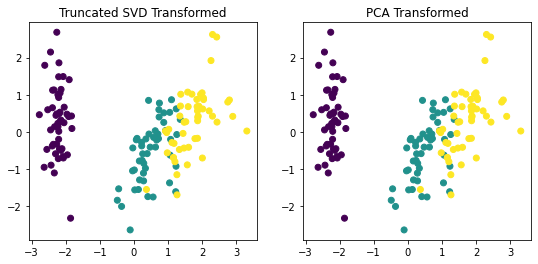

In [37]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TrunctedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_sclaed)

#TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [39]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

#2개의 변환이 서로 동일함

2.3657869644792365e-15
-7.19910242530375e-17


## 06-5 NMF (Non-Negative Matrix Factorization) <br>
### [NMF 개요]
- NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 (Low-Rank Approximation) 방식의 변형임
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수 (0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭함 <br>
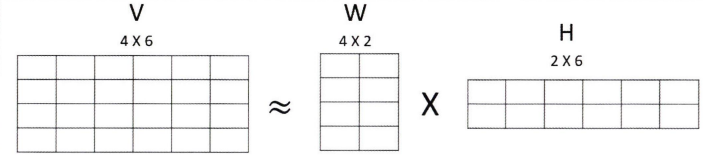 <br>
- NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용ㅇ되고 있음
- 사이킷런에서 NMF는 NMF 클래스를 이용해 지원됨

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

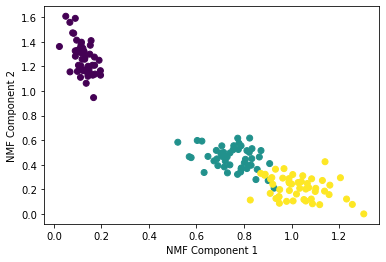

In [40]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

- NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨
- 영화 추천과 같은 추천 (Recommendations) 영역에 활발하게 적용됨
- 사용자의 상품 평가 데이터 세트인 사용자-평가 순위 (user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위 (Rating)를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식임
- 이를 잠재 요소 (Latent Factoring) 기반의 추천 방식이라고 함